In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input,Dropout,Dense,GRU
import matplotlib.pyplot as plt

In [3]:
import tensorflow_hub as hub
import tensorflow_text as text

from keras.layers import Input,Dropout,Dense

In [4]:
data = os.listdir("../DiseasesData")

In [50]:
data

['.ipynb_checkpoints',
 'api',
 'data.csv',
 'dataset.csv',
 'Dieseases detection using Bert.ipynb',
 'embed.joblib',
 'model',
 'model.joblib',
 'model1.joblib',
 'model_v1',
 'predict.joblib',
 'Symptom-severity.csv',
 'symptom_Description.csv',
 'symptom_precaution.csv']

In [14]:
precaustion = pd.read_csv("../DiseasesData/symptom_precaution.csv")

In [24]:
precaustion = precaustion.transpose()

In [34]:
precaustion.replace(np.nan,"",inplace=True)

In [35]:
precaustion.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Disease,Drug Reaction,Malaria,Allergy,Hypothyroidism,Psoriasis,GERD,Chronic cholestasis,hepatitis A,Osteoarthristis,(vertigo) Paroymsal Positional Vertigo,Hypoglycemia,Acne,Diabetes,Impetigo,Hypertension,Peptic ulcer diseae,Dimorphic hemmorhoids(piles),Common Cold,Chicken pox,Cervical spondylosis,Hyperthyroidism,Urinary tract infection,Varicose veins,AIDS,Paralysis (brain hemorrhage),Typhoid,Hepatitis B,Fungal infection,Hepatitis C,Migraine,Bronchial Asthma,Alcoholic hepatitis,Jaundice,Hepatitis E,Dengue,Hepatitis D,Heart attack,Pneumonia,Arthritis,Gastroenteritis,Tuberculosis
Precaution_1,stop irritation,Consult nearest hospital,apply calamine,reduce stress,wash hands with warm soapy water,avoid fatty spicy food,cold baths,Consult nearest hospital,acetaminophen,lie down,lie down on side,bath twice,have balanced diet,soak affected area in warm water,meditation,avoid fatty spicy food,avoid fatty spicy food,drink vitamin c rich drinks,use neem in bathing,use heating pad or cold pack,eat healthy,drink plenty of water,lie down flat and raise the leg high,avoid open cuts,massage,eat high calorie vegitables,consult nearest hospital,bath twice,Consult nearest hospital,meditation,switch to loose cloothing,stop alcohol consumption,drink plenty of water,stop alcohol consumption,drink papaya leaf juice,consult doctor,call ambulance,consult doctor,exercise,stop eating solid food for while,cover mouth
Precaution_2,consult nearest hospital,avoid oily food,cover area with bandage,exercise,stop bleeding using pressure,avoid lying down after eating,anti itch medicine,wash hands through,consult nearest hospital,avoid sudden change in body,check in pulse,avoid fatty spicy food,exercise,use antibiotics,salt baths,consume probiotic food,consume witch hazel,take vapour,consume neem leaves,exercise,massage,increase vitamin c intake,use oinments,wear ppe if possible,eat healthy,antiboitic therapy,vaccination,use detol or neem in bathing water,vaccination,reduce stress,take deep breaths,consult doctor,consume milk thistle,rest,avoid fatty spicy food,medication,chew or swallow asprin,medication,use hot and cold therapy,try taking small sips of water,consult doctor
Precaution_3,stop taking drug,avoid non veg food,,eat healthy,consult doctor,maintain healthy weight,consult doctor,avoid fatty spicy food,follow up,avoid abrupt head movment,drink sugary drinks,drink plenty of water,consult doctor,remove scabs with wet compressed cloth,reduce stress,eliminate milk,warm bath with epsom salt,avoid cold food,take vaccine,take otc pain reliver,use lemon balm,drink cranberry juice,use vein compression,consult doctor,exercise,consult doctor,eat healthy,keep infected area dry,eat healthy,use poloroid glasses in sun,get away from trigger,medication,eat fruits and high fiberous food,consult doctor,keep mosquitos away,eat healthy,keep calm,rest,try acupuncture,rest,medication
Precaution_4,follow up,keep mosquitos out,use ice to compress itching,get proper sleep,salt baths,exercise,eat healthy,medication,salt baths,relax,consult doctor,avoid too many products,follow up,consult doctor,get proper sleep,limit alcohol,consume alovera juice,keep fever in check,avoid public places,consult doctor,take radioactive iodine treatment,take probiotics,dont stand still for long,follow up,consult doctor,medication,medication,use clean cloths,medication,consult doctor,seek help,follow up,medication,medication,keep hydrated,follow up,,follow up,massage,ease back into eating,rest


In [47]:
prec = {}

In [48]:
k = None
for i in precaustion.columns:
    k=(precaustion[i][0])
    val= ""
    for j in range(1,5):
        val+=(precaustion[i][j])
        val+=" "
    print(k,val)
    prec[k]=val.strip()
    print("\n")
    

Drug Reaction stop irritation consult nearest hospital stop taking drug follow up 


Malaria Consult nearest hospital avoid oily food avoid non veg food keep mosquitos out 


Allergy apply calamine cover area with bandage  use ice to compress itching 


Hypothyroidism reduce stress exercise eat healthy get proper sleep 


Psoriasis wash hands with warm soapy water stop bleeding using pressure consult doctor salt baths 


GERD avoid fatty spicy food avoid lying down after eating maintain healthy weight exercise 


Chronic cholestasis cold baths anti itch medicine consult doctor eat healthy 


hepatitis A Consult nearest hospital wash hands through avoid fatty spicy food medication 


Osteoarthristis acetaminophen consult nearest hospital follow up salt baths 


(vertigo) Paroymsal  Positional Vertigo lie down avoid sudden change in body avoid abrupt head movment relax 


Hypoglycemia lie down on side check in pulse drink sugary drinks consult doctor 


Acne bath twice avoid fatty spicy 

In [49]:
prec

{'Drug Reaction': 'stop irritation consult nearest hospital stop taking drug follow up',
 'Malaria': 'Consult nearest hospital avoid oily food avoid non veg food keep mosquitos out',
 'Allergy': 'apply calamine cover area with bandage  use ice to compress itching',
 'Hypothyroidism': 'reduce stress exercise eat healthy get proper sleep',
 'Psoriasis': 'wash hands with warm soapy water stop bleeding using pressure consult doctor salt baths',
 'GERD': 'avoid fatty spicy food avoid lying down after eating maintain healthy weight exercise',
 'Chronic cholestasis': 'cold baths anti itch medicine consult doctor eat healthy',
 'hepatitis A': 'Consult nearest hospital wash hands through avoid fatty spicy food medication',
 'Osteoarthristis': 'acetaminophen consult nearest hospital follow up salt baths',
 '(vertigo) Paroymsal  Positional Vertigo': 'lie down avoid sudden change in body avoid abrupt head movment relax',
 'Hypoglycemia': 'lie down on side check in pulse drink sugary drinks consult

In [25]:
df = pd.read_csv("../DiseasesData/data.csv")

In [26]:
df['data'][0]

'itching  skinrash  nodalskineruptions  dischromicpatches'

In [110]:
x_train[666]

'chills  vomiting  fatigue  weightloss  highfever  breathlessness  sweating  lossofappetite  mildfever  yellowingofeyes  swelledlymphnodes  malaise  phlegm  chestpain  bloodinsputum'

In [5]:
# def generate_corpus(data):
#     corpus = []
#     for i in X.columns:
#         val = ""
#         for j in range(X.shape[0]):
#             val+=(X[i][j])
#             val+=" "
#         corpus.append(val.strip())
#     return corpus

In [6]:
# corpus = generate_corpus(X)

In [7]:
# fc,tc = 0,0

# for i in corpus:
#     if(i.__contains__('_')):
#         tc+=1
#     else:
#         fc+=1
# print(fc,tc)

In [8]:
#imp code
# for i in range(len(corpus)):
#     if(corpus[i].__contains__('yellow_crust_ooze')):
#         corpus[i] = (corpus[i].replace('yellow_crust_ooze','yellowcrustooze'))
#         print(corpus[i])

# Loading Bert

In [9]:
# encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')
# preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

In [10]:
# review=[]

In [11]:
# data = df['data']
# for i in range(4678,4685):
#     review.append(data[i])

In [24]:
df

NameError: name 'df' is not defined

<AxesSubplot:title={'center':'Reviews for each topic (n, %)'}, ylabel='Topics'>

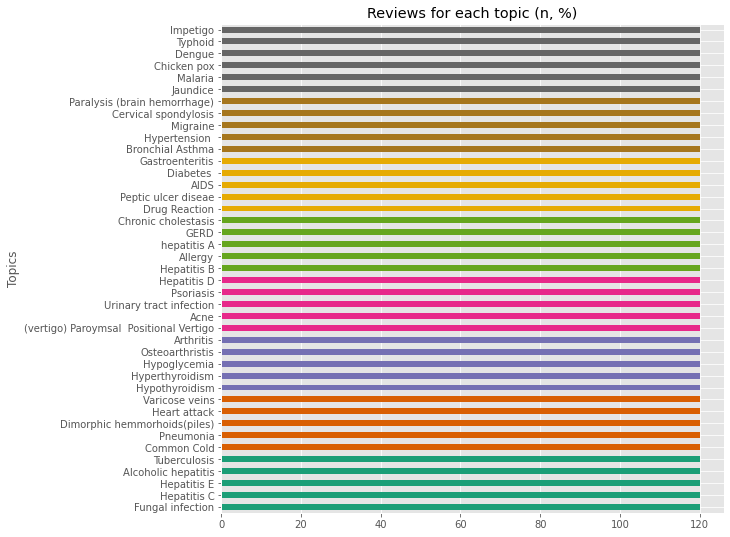

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(df["Disease"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['Disease'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Topics",
                                                 color=colors,
                                                 figsize=(9,9))

In [13]:
df['label'] = LabelEncoder().fit_transform(df['Disease'].values)

In [14]:
len(set(df['label']))

41

In [15]:
y = tf.keras.utils.to_categorical(df["label"].values, num_classes=41)

x_train, x_test, y_train, y_test = tts(df['data'], y, test_size=0.25)

In [100]:
x_train[260]

'continuoussneezing  chills  fatigue  cough  highfever  headache  swelledlymphnodes  malaise  phlegm  throatirritation  rednessofeyes  sinuspressure  runnynose  congestion  chestpain  lossofsmell  musclepain'

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
class Getembed:
    def get_embeddings(self,sentences):
        '''return BERT-like embeddings of input text
          Args:
            - sentences: list of strings
          Output:
            - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
          '''
        encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')
        preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
    
    
        preprocessed_text = preprocessor(sentences)
        return encoder(preprocessed_text)


    

In [18]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
embed = Getembed()
x = embed.get_embeddings(i)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(41, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

In [19]:
n_epochs = 20

# Mets=[tf.keras.Mu(name='accuracy'),keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/20
116/116 [==============================] - 101s 814ms/step - loss: 3.2342 - accuracy: 0.1794 - val_loss: 2.6134 - val_accuracy: 0.4870
Epoch 2/20
116/116 [==============================] - 94s 808ms/step - loss: 2.3181 - accuracy: 0.4799 - val_loss: 1.9076 - val_accuracy: 0.8089
Epoch 3/20
116/116 [==============================] - 93s 805ms/step - loss: 1.7493 - accuracy: 0.6775 - val_loss: 1.5549 - val_accuracy: 0.7821
Epoch 4/20
116/116 [==============================] - 93s 805ms/step - loss: 1.3727 - accuracy: 0.7883 - val_loss: 1.1539 - val_accuracy: 0.9341
Epoch 5/20
116/116 [==============================] - 93s 806ms/step - loss: 1.1137 - accuracy: 0.8466 - val_loss: 0.9475 - val_accuracy: 0.9472
Epoch 6/20
116/116 [==============================] - 93s 804ms/step - loss: 0.9013 - accuracy: 0.8992 - val_loss: 0.7787 - val_accuracy: 0.9659
Epoch 7/20
116/116 [==============================] - 93s 804ms/step - loss: 0.7546 - accuracy: 0.9225 - val_loss: 0.6502 - val_a

In [20]:
x_test

4698    vomiting  yellowishskin  abdominalpain  swelli...
3683    jointpain  neckpain  kneepain  hipjointpain  s...
1797    chills  vomiting  highfever  sweating  nausea ...
1636        skinrash  highfever  blister  yellowcrustooze
366     vomiting  headache  nausea  spinningmovements ...
2133                     vomiting  dehydration  diarrhoea
1912    chills  fatigue  cough  highfever  breathlessn...
551     itching  vomiting  fatigue  weightloss  highfe...
2900    fatigue  cramps  bruising  obesity  swollenleg...
4836    skinrash  jointpain  skinpeeling  silverlikedu...
3403    itching  skinrash  nodalskineruptions  dischro...
123          backpain  neckpain  dizziness  lossofbalance
2186    vomiting  headache  weaknessofonebodyside  alt...
2084    itching  vomiting  yellowishskin  lossofappeti...
209     itching  fatigue  lethargy  yellowishskin  dar...
1464    jointpain  fatigue  highfever  yellowishskin  ...
3135    jointpain  vomiting  yellowishskin  darkurine ...
1773    vomiti

In [21]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [112]:
x_test[2007]

'vomiting  headache  nausea  spinningmovements  lossofbalance'

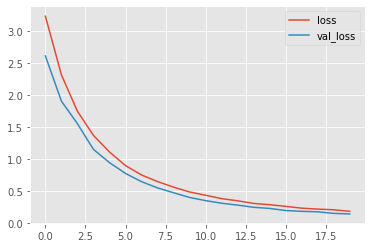

In [22]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

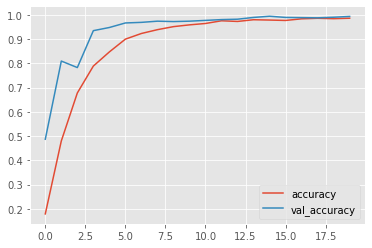

In [23]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [80]:
class Predict:
    def predict_class(self,reviews):
        '''predict class of input text
        Args:
        - reviews (list of strings)
        Output:
        - class (list of int)
      '''
        return [np.argmax(pred) for pred in model.predict(reviews)]
    
    def actual_value(self,values):
        val_back={15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
    
        ans = []
        for i in values:
            ans.append(val_back[i])
        return ans
    
    def convert_value(self,values):
        return [np.argmax(i) for i in values]
            
    
    

In [81]:
rev = Predict()

In [44]:
pred = rev.predict_class(x_test)
#print(pred)
pred_actual_value = rev.actual_value(pred)
yt = rev.convert_value(y_test)
ytest_actual_value = rev.actual_value(yt)

In [46]:
print(ytest_actual_value)

['Alcoholic hepatitis', 'Osteoarthristis', 'Malaria', 'Impetigo', '(vertigo) Paroymsal  Positional Vertigo', 'Gastroenteritis', 'Pneumonia', 'Jaundice', 'Varicose veins', 'Psoriasis', 'Fungal infection', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Chronic cholestasis', 'Hepatitis B', 'Hepatitis E', 'hepatitis A', 'Paralysis (brain hemorrhage)', 'Allergy', 'Gastroenteritis', 'Urinary tract infection', 'Paralysis (brain hemorrhage)', 'Osteoarthristis', 'Psoriasis', 'Hepatitis B', 'Tuberculosis', 'Pneumonia', 'Common Cold', 'Hepatitis D', 'Malaria', 'hepatitis A', 'Drug Reaction', 'Bronchial Asthma', 'Chronic cholestasis', 'Typhoid', 'Hepatitis C', 'Varicose veins', 'GERD', 'Paralysis (brain hemorrhage)', '(vertigo) Paroymsal  Positional Vertigo', 'Impetigo', 'Dimorphic hemmorhoids(piles)', 'Hepatitis B', 'Migraine', 'Hypertension ', 'Heart attack', 'Cervical spondylosis', 'Hypothyroidism', 'hepatitis A', 'Paralysis (brain hemorrhage)', 'Psoriasis', 'Hypoglycemia', 'Acne', 'C

In [ ]:
# model.save("../DiseasesData/model_v1")

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
cosine_similarity( [ pred,yt])

array([[1.        , 0.99719769],
       [0.99719769, 1.        ]])

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(ytest_actual_value,pred_actual_value))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.89      1.00      0.94        32
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        34
                              Arthritis       1.00      1.00      1.00        29
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       1.00      1.00      1.00        26
                            Chicken pox       1.00      1.00      1.00        34
                    Chronic cholestasis       0.96      1.00      0.98        26
                            Common Cold       1.00      1.00      1.00        33
                           

In [ ]:
# ################## Testing own ###############


# symtom = []
# for i in range(2):
#     x = input()
#     symtom.append(x)
    


In [51]:
from joblib import dump

In [58]:
model.save("../DiseasesData/model/model_1")

INFO:tensorflow:Assets written to: ../DiseasesData/model/model_1\assets


INFO:tensorflow:Assets written to: ../DiseasesData/model/model_1\assets


In [53]:
dump(embed,"../DiseasesData/embed.joblib")

['../DiseasesData/embed.joblib']

In [89]:
dump(rev,"../DiseasesData/predict.joblib")

['../DiseasesData/predict.joblib']

In [56]:
from joblib import load

In [5]:
#encode = load("../DiseasesData/embed.joblib")
model = tf.keras.models.load_model("../DiseasesData/model/model_1")

In [6]:
from keras_visualizer import visualizer

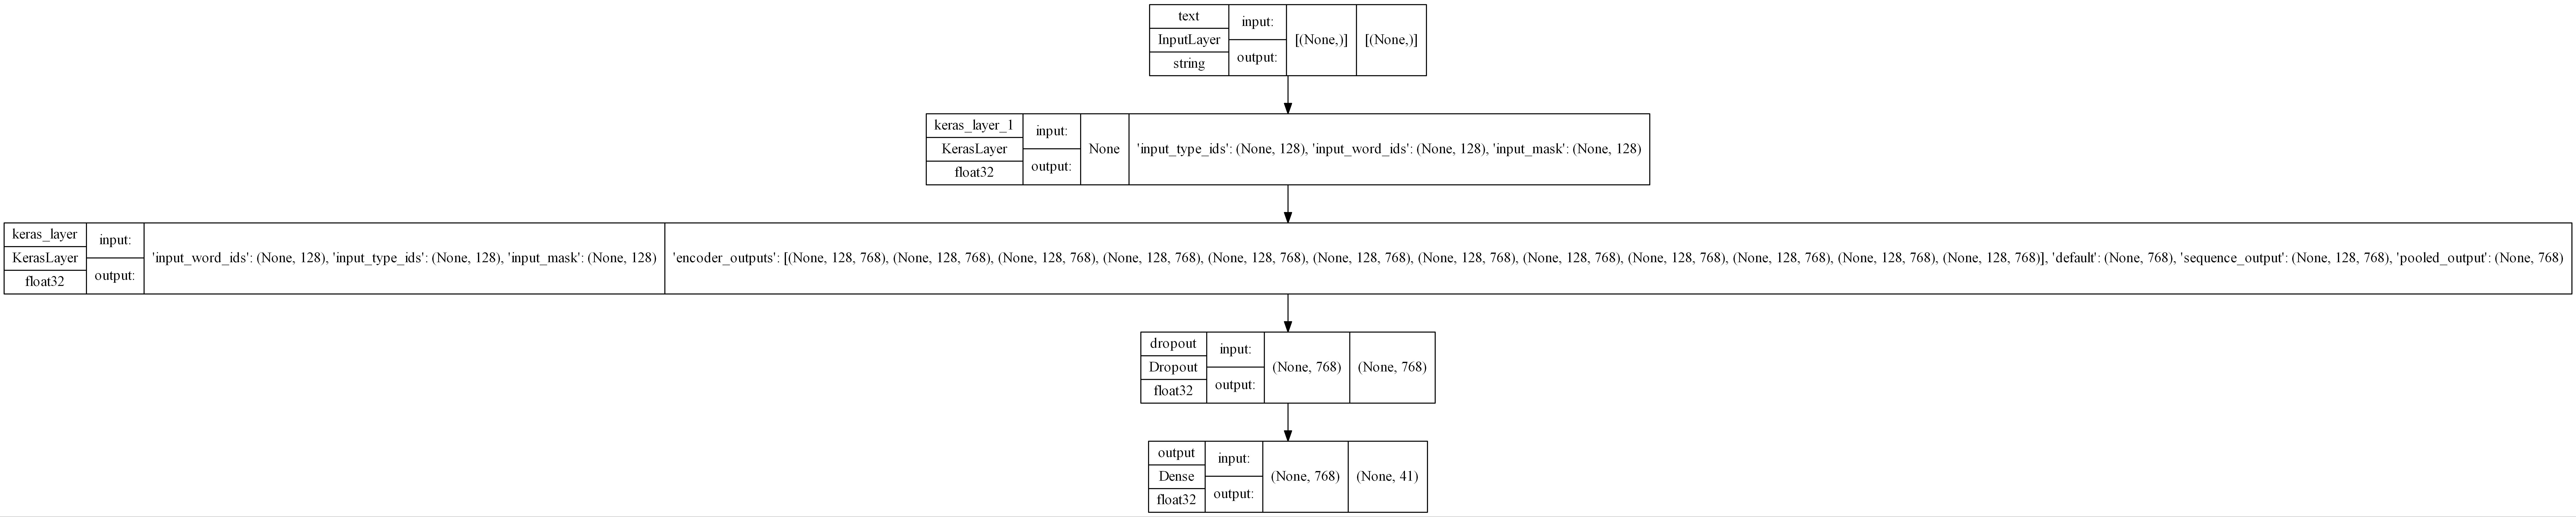

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_dtype=True,to_file='../DiseasesData/modelplot.jpg',rankdir='TB',dpi=300)

In [58]:
class Predict:
    def predict_class(self,reviews):
        '''predict class of input text
        Args:
        - reviews (list of strings)
        Output:
        - class (list of int)
      '''
        return [np.argmax(pred) for pred in model.predict(reviews)]
    
    def actual_value(self,values):
        val_back={15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
    
        ans = []
        for i in values:
            ans.append(val_back[i])
        return ans
    
    def convert_value(self,values):
        return [np.argmax(i) for i in values]

In [59]:
predict = Predict()

In [63]:
def Prediction(symtom:str):
    prec = {'Drug Reaction': 'stop irritation consult nearest hospital stop taking drug follow up',
 'Malaria': 'Consult nearest hospital avoid oily food avoid non veg food keep mosquitos out',
 'Allergy': 'apply calamine cover area with bandage  use ice to compress itching',
 'Hypothyroidism': 'reduce stress exercise eat healthy get proper sleep',
 'Psoriasis': 'wash hands with warm soapy water stop bleeding using pressure consult doctor salt baths',
 'GERD': 'avoid fatty spicy food avoid lying down after eating maintain healthy weight exercise',
 'Chronic cholestasis': 'cold baths anti itch medicine consult doctor eat healthy',
 'hepatitis A': 'Consult nearest hospital wash hands through avoid fatty spicy food medication',
 'Osteoarthristis': 'acetaminophen consult nearest hospital follow up salt baths',
 '(vertigo) Paroymsal  Positional Vertigo': 'lie down avoid sudden change in body avoid abrupt head movment relax',
 'Hypoglycemia': 'lie down on side check in pulse drink sugary drinks consult doctor',
 'Acne': 'bath twice avoid fatty spicy food drink plenty of water avoid too many products',
 'Diabetes ': 'have balanced diet exercise consult doctor follow up',
 'Impetigo': 'soak affected area in warm water use antibiotics remove scabs with wet compressed cloth consult doctor',
 'Hypertension ': 'meditation salt baths reduce stress get proper sleep',
 'Peptic ulcer diseae': 'avoid fatty spicy food consume probiotic food eliminate milk limit alcohol',
 'Dimorphic hemmorhoids(piles)': 'avoid fatty spicy food consume witch hazel warm bath with epsom salt consume alovera juice',
 'Common Cold': 'drink vitamin c rich drinks take vapour avoid cold food keep fever in check',
 'Chicken pox': 'use neem in bathing  consume neem leaves take vaccine avoid public places',
 'Cervical spondylosis': 'use heating pad or cold pack exercise take otc pain reliver consult doctor',
 'Hyperthyroidism': 'eat healthy massage use lemon balm take radioactive iodine treatment',
 'Urinary tract infection': 'drink plenty of water increase vitamin c intake drink cranberry juice take probiotics',
 'Varicose veins': 'lie down flat and raise the leg high use oinments use vein compression dont stand still for long',
 'AIDS': 'avoid open cuts wear ppe if possible consult doctor follow up',
 'Paralysis (brain hemorrhage)': 'massage eat healthy exercise consult doctor',
 'Typhoid': 'eat high calorie vegitables antiboitic therapy consult doctor medication',
 'Hepatitis B': 'consult nearest hospital vaccination eat healthy medication',
 'Fungal infection': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths',
 'Hepatitis C': 'Consult nearest hospital vaccination eat healthy medication',
 'Migraine': 'meditation reduce stress use poloroid glasses in sun consult doctor',
 'Bronchial Asthma': 'switch to loose cloothing take deep breaths get away from trigger seek help',
 'Alcoholic hepatitis': 'stop alcohol consumption consult doctor medication follow up',
 'Jaundice': 'drink plenty of water consume milk thistle eat fruits and high fiberous food medication',
 'Hepatitis E': 'stop alcohol consumption rest consult doctor medication',
 'Dengue': 'drink papaya leaf juice avoid fatty spicy food keep mosquitos away keep hydrated',
 'Hepatitis D': 'consult doctor medication eat healthy follow up',
 'Heart attack': 'call ambulance chew or swallow asprin keep calm',
 'Pneumonia': 'consult doctor medication rest follow up',
 'Arthritis': 'exercise use hot and cold therapy try acupuncture massage',
 'Gastroenteritis': 'stop eating solid food for while try taking small sips of water rest ease back into eating',
 'Tuberculosis': 'cover mouth consult doctor medication rest'}
    text = [symtom]
    pred = [np.argmax(pred) for pred in model.predict(text)]
    acval = predict.actual_value(pred)
    return {"sentence":text,"preval":acval[0],"precaution tip":prec[acval[0]]}

In [64]:
print(Prediction('itching  skinrash  nodalskineruptions  dischromicpatches'))

{'sentence': ['itching  skinrash  nodalskineruptions  dischromicpatches'], 'preval': 'Fungal infection', 'precaution tip': 'bath twice use detol or neem in bathing water keep infected area dry use clean cloths'}


In [22]:
############tflite version##########333

In [1]:
# convertor = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = convertor.convert()
# tflite_model